# コーナー検出器

参考: http://www.mi.t.u-tokyo.ac.jp/harada/lectures/IIT/internal/04_detector_descriptor_20160511.pdf

![特徴量](Figs/features.png "特徴量のいろいろ")  
 青い囲みが平坦領域、黒く囲ったところがエッジ、赤く囲ったところがコーナー
* 平坦領域: 小領域を微小移動させても小領域内の画素値の変化は少ない
* エッジ(縁):　小領域をエッジに沿って微小移動させても小領域内の画素値の変化は少ないが、エッジに垂直方向に微小移動させると変化が大きい
* コーナー(角): 小領域をどの方向に微小移動させても小領域内の画素値は変化する

物体の「角のような点」を見つける検出器。直交する2方向でともに輝度が大きく変化する点をコーナーとみなし、そのような点を発見する


## (1) ヘシアンコーナー検出器(Hessian corner detector)

画像を$x$方向、$y$方向、輝度$I$の3次元空間における曲面とみなすと、コーナーは曲面が大きく変化している点と考えられる
⇒ $xyI$空間で曲率が大きな点を探す

ガウス曲率(Gauss curvature): $K = \frac{det({\bf H})}{(1+I^2_x+I^2_y)^2}$ 

${\bf H}$はヘシアン(ヘッセ行列): 画像の2次微分。${\bf H}=\left( \begin{array}{c} I_{xx}(x,y) & I_{xy}(x,y)\\  I_{yx}(x,y) & I_{yy}(x,y) \end{array}\right)$

$\det({\bf H})=I_{xx}I_{yy} - I^2_{xy}$

ヘシアンコーナー検出器：$\det({\bf H})$が極大となる画素をコーナーと捉える、曲率の大きな点を捉えているとみなせる

## (2) モラベックコーナー検出器(Moravec corner detector)

（説明はWikiPediaから）

画像の各ピクセルを検査し、ピクセルを中心とするパッチが、近傍の多く重なるパッチとどの程度似ているかを考慮してコーナーかどうかを調べる。類似度はパッチの差分の2乗和(SSD)によって計測される。低い数値は類似性が高いことを示す。

ピクセルが同程度の強度の範囲内ならば、近傍のパッチは類似している。ピクセルがエッジ上にあれば、エッジと直交する方向にある近傍のパッチは大きく異なって見えるが、エッジと等方向にある近傍のパッチは小さな変化として検出される。ピクセルが全ての方向に異なった特徴点上にあれば、近傍のパッチはどれも類似しない。

コーナーの強さはパッチと近傍のパッチ（水平，垂直と2つの対角線方向）のSSDの最小値として定義される。この数値が極大であれば特徴点が存在するということになる。

モラベックが指摘したように、このオペレータの大きな問題の1つは等方的でない、すなわち近傍のエッジと方向が異なるエッジが存在した場合には、特徴点として検出されないことである。

## (3) ハリスコーナー検出器(Harris corner detector)

基本的にはいろいろな方向に画素の位置を元の位置$(x,y)$から微小に$ (u,v)$ 移動してみて画素値がどのように違うか（「見え方の違い」）を求めるものであり、次のように表現される(噛み砕けば、移動後の画素値と元の位置の画素値との差を2乗することで0以上の値にするとともに差を強調している。その値に窓関数の値を掛け、移動を全方向に行った和を求めている）:

$E(u,v) = \underbrace{\sum_{x,y}}_\text{小領域の画素すべてに対し総和を求める} \underbrace{w(x,y)}_\text{窓関数} \, [\underbrace{I(x+u,y+v)}_\text{微小変位させた後の画素値}-\underbrace{I(x,y)}_\text{元の位置の画素値}]^2$

ここで窓関数は矩形窓か、画素に対して重み付けをするガウス窓を用いる．

コーナーを検出するには、$E(u,v)$の大きな小領域を求めれば良い

${\bf M}  = \sum_{x,y} w(x,y) \left( \begin{array}{cc}I_x^2 & I_x I_y \\
                                     I_x I_y & I_y^2 \end{array} \right) \hspace{20em}$     (A)
                                     
とすると、$E(u,v)$は次のように近似できる:
                                     
$E(u,v) \approx \begin{pmatrix} u & v \end{pmatrix} M \begin{pmatrix} u \\ v \end{pmatrix}$

窓関数を方形窓とするとMは次のように表される: ${\bf M} = \sum_{x,y} \left( \begin{array}{c}I_x^2 & I_x I_y \\
                                     I_x I_y & I_y^2 \end{array} \right)$

ここで$\sum_{s,y}I^2_{x} = \lambda_x (>0), \sum_{x,y}I^2_{y} = \lambda_y (y > 0)$とすると, $x, y$座標に対して整列していれば、
${\bf M} = \left( \begin{array}{cc}\lambda_x & 0 \\
                                     0 & \lambda_y \end{array} \right)$
という形で表され、コーナーでは$\lambda_x, \lambda_y$とも大きな値を取り、エッジではどちらかの値が0, 輝度の変化がないところでは${\bf M}={\bf 0}$となる。


しかしコーナーは必ずしも$x,y$座標に対して整列しているとは限らないので、
${\bf M}$の固有値$\lambda_1, \lambda_2$と固有ベクトルを用いて${\bf M}$を対角化する:

${\bf M} = {\bf U}  \left( \begin{array}{cc}\lambda_1 & 0 \\
                                     0 & \lambda_2 \end{array} \right){\bf U}^{-1}$

ここで${\bf U}= \begin{pmatrix} u_1 & u_2 \end{pmatrix}$ で、回転行列とみなせる。そこで領域を適切に回転させることにより、結局のところ固有値だけを利用してコーナーの判定が可能になる。

1. ${\displaystyle \lambda _{1}\approx 0}$ かつ ${\displaystyle \lambda _{2}\approx 0}$ であれば、ピクセル ${\displaystyle (x,y)}$は特徴点をもたない。
2. ${\displaystyle \lambda _{1}\approx 0}$ かつ $\lambda_{2}$ が正のある程度大きい値であれば、エッジが存在する。

3. $\lambda_{1} , \  \lambda_{2}$ が正の大きな値であれば、コーナーが存在する。

![固有値とコーナーの関係](Harris_region.png "Harrisコーナー検出")

しかし固有値の計算はコストが高いので、さらに
$\det(M)=\lambda_1 \lambda_2$、$trace(M)=\lambda_1+\lambda_2 \hspace{10em}$(B)

であるから、
コーナーネス(cornerness)$R = det(M) - k(trace(M))^2$
で定義される指標($k$の値は0.04〜0.06がよく用いられる）により、$R$が閾値よりも大きければコーナーと判定する。

以上をまとめると、ハリスコーナー検出器の手順は以下のようになる:
1. 画像を平滑化する
2. 各画素の微分$I_x, I_y$を計算する
3. (A)に基づき、行列${\bf M}$を計算する
4. (B)に基づき、コーナーネスRを計算する
5. Rの値が閾値よりも大きければコーナーと判定する

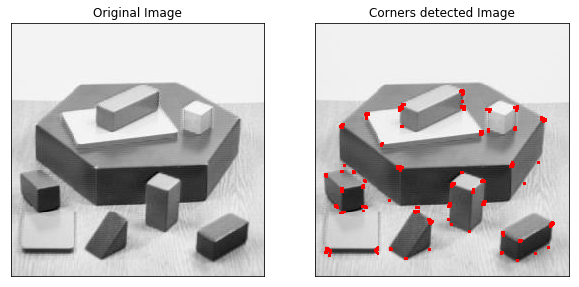

In [15]:
# Harris corner detector using OpenCV
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

filename = 'Figs/blox.jpg'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]
img=cv2.cvtColor(img,cv2.COLOR_RGB2BGR)

plt.figure(figsize=(10,7))
plt.subplot(121), plt.imshow(gray,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img)
plt.title('Corners detected Image'), plt.xticks([]), plt.yticks([])
plt.show()

## (4) SUSAN
局所領域の見た目からコーナーを判断する手法ー微分を用いないために平滑化が不要

USAN (univalue segment assimilating nucleus): 円形の局所領域の中心の画素と近い輝度を持つ画素の数
![USANのためのマスク]( Figs/USAN.gif "USANのためのマスク")　　![USAN]( Figs/USAN2.gif "対象画素と似た画素がUSAN")　

上図の(a)〜(e)はUSAN計算のためのマスク（円形の局所領域）、下図は対象画素(＋マークのある画素）と似た輝度をもつ画素を白く塗りつぶしたもの。コーナー(図ではa)ではUSANの値が小さくなる(黒い領域を0,　白い領域を1として総計する）。この性質を利用し、USANの極小値(SUSAN, smallest USAN)を探索することによりコーナーを検出できる。

## (5) セグメントテスト

マスク円の中心画素と周囲の画素の比較によりコーナーを判断するが、SUSANの探索よりも簡便な手法。
![セグメントテスト](Figs/SegmentTest.png "セグメントテスト説明図")

上の図を例とする。(適当な$r, n, t$を定めておく）画素$p$を中心として半径$r$上にある$n$個以上の隣接する画素が、画素$p$との輝度差が閾値$t$以上の場合に$p$をコーナーと判定する。上の図では$r=3$とすると、$p$の周囲の画素は$16$個、そのうち$p$との画素の輝度値の差が閾値$t$以上のものが$12$個以上あればコーナーと判定、というようにする。上の図では$p$よりも遥かに明るいものが12個(1,2,3,4,5,6,11,12,13,14,15,16)なのでコーナーと判定する。ただ、すべてを調べると時間がかかるので次のようにして高速化する:

1. 画素1と画素9($p$を挟んで正反対の位置にある画素）を調べる。両方の画素値がともに$p$との輝度値の差の絶対値が閾値$t$以下ならコーナーとせず棄却。
2. $p$が棄却されない場合、画素5と13を調べる。画素1,5,9,13のうち少なくとも3つの画素の輝度と$p$の輝度との差閾値$t$以上であればコーナー候補として残す。それ以外は棄却する。
3. コーナー候補に対して、残り12個の画素すべての輝度を調べる。

ただし、次のような問題がある:

1. n < 12の場合、この方法は使えない。$n$の値が最適化どうかが不明
2. 画素を調べる順番の適切さが不明
3. 検査の結果が無駄に捨てられてしまう。
4. 複数特徴点が近隣の点で検出される

1から3の問題をFASTコーナー検出器では機械学習(決定木)を用いて解決する。4の問題は「非最大値抑制」により扱う

## (6) FASTコーナー検出器

参考:http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/py_tutorials/py_feature2d/py_fast/py_fast.html

FASTコーナー検出器(FSAT corner detector)はセグメントテスト方式の改良。注目する画素の状態をコーナーかそうでないか、という二分類問題とみなす。この判定には決定木を用いて効率的に行う。

注目画素の表現方法: 

1. 注目画素$p$と(r=3として）その周囲の16個の画素のインデック$i \in \{1,\ldots,16\}$とする。
2. 画素$i$の輝度値を $I(x_i)$ とし、注目画素$p$の輝度値を$I(x_p)$で表す。
3. 周囲の画素の状態$S(i)$お、閾値$t$を用いて3分類する(d: darker, s: similar, b: brighter)

 $ S(i) = \left\{ \begin{array}{cl} d, & I(x_i) \leq I(x_p)-t \\
                                  s, & I(x_p) - t < I(x_i) < I(x_p) + t\\
                                  b, & I(x_i) \geq I(x_p)+t \\ \end{array} \right. $

4. 注目画素$p$を1〜16の画素の分類に基づいてベクトルで表す.

#### 決定木の学習
適切な決定木の構造は、コーナーと非コーナーに分類された画像の集合から学習によって構築される。

1. ブール値変数 $K_p$ を定義する：その値は p がコーナーなら真、そうでなければ偽とする
2. ID3 アルゴリズム (決定木による分類器)を用いて変数 $K_p$ に基づき「真」のクラスについての判別基準を学習する。$K_p$のエントロピー基準で、候補ピクセルがコーナーかどうかについて最大の情報利得が得られる決定木を生成する.
3. エントロピーが0になるまですべてのサブセットに対しこの手順を繰り返す

こうして作られた決定木を他の画像におけるコーナー検出に用いる


隣接領域に注目点を多重に検出してしまうのは、もうひとつの問題である。これは非最大値抑制によって解決される。

 1. スコア関数 V をすべての検出された特徴点に対して計算する。ここで V はp とその周辺 16 個のピクセル値($x_i, i \in \{1,\ldots,16\}$)それぞれとの差の絶対値の和とする
(ここで、$C_b = \{x_i\ | \ I(x_i) \geq I(x_p)+t\}, C_d = \{x_i \  | \ I(x_i) \leq I(x_p)- t\}$)<BR>
$V = \max(\sum_{i \in C_b} |I(x_i)-I(x_p)| - t, \sum_{i \in C_d} |I(x_i)-I(x_p)| - t)$
 2. 2個の隣接するキーポイントに対し、その V値を計算する。
 3. 2つのうちどちらか V値の小さい方を候補から外す.


Threshold:  10
nonmaxSuppression:  True
neighborhood:  2
Total Keypoints with nonmaxSuppression:  431


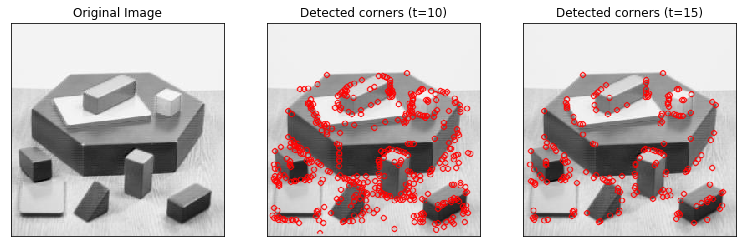

In [27]:
%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('blox.jpg',0)

# まずデフォルト値で FASTオブジェクトを作る
fast = cv2.FastFeatureDetector_create()

# デフォルトのパラメタをすべて表示
print("Threshold: ", fast.getThreshold())
print ("nonmaxSuppression: ", fast.getNonmaxSuppression())
print("neighborhood: ", fast.getType())
print("Total Keypoints with nonmaxSuppression: ", len(kp))

# キーポイントを求めて描画する
kp = fast.detect(img,None)
img2 = cv2.drawKeypoints(img, kp,None,color=(255,0,0))

# 閾値を設定
fast.setThreshold(15)
kp3 = fast.detect(img,None)
img3 = cv2.drawKeypoints(img, kp3, None,color=(255,0,0))

plt.figure(figsize=(13,7))
plt.subplot(131), plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img2)
plt.title('Detected corners (t=10)'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img3)
plt.title('Detected corners (t=15)'), plt.xticks([]), plt.yticks([])
plt.show()

このアルゴリズムによる検出器は現存する他のものと比べて数倍速い。

しかし、高次のノイズに弱い。頑健さは閾値に依存する。